# Classificação de vídeos com PYTHON - PARTE 1

### Vídeos são um conjunto de imagens (frames) organizadas em uma determinada ordem.

***

## 1. Reconhecimento de imagens com KERAS

### O dataset utilizado neste notebook foi o [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist).

In [1]:
# Importação de bibliotecas;

import numpy as np
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
#!pip install tensorflow
#!pip install matplotlib

In [3]:
# Acessando aos dados:

dataset = keras.datasets.fashion_mnist
((imagens_treino, id_treino), (imagens_teste, id_teste)) = dataset.load_data()     # Load_data: função do keras. Devolve 2 tuplas contendo os dados de treino e os dados de teste.

In [4]:
# Investigação preliminar das imagens:

imagens_treino.shape

(60000, 28, 28)

#### Note que são 60000 imagens descritas em 28 linhas e 28 colunas (28x28)

In [5]:
imagens_teste.shape

(10000, 28, 28)

#### São, no total, 70mil imagens de dimensões 28x28 pixels.

In [6]:
# Investigação preliminar das informações:

print(len(id_treino))
print(len(id_teste))

60000
10000


In [7]:
# Verificando as identificações disponíveis:

np.unique(id_treino)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
total_ids = 10

#### De acordo com a documentação do dataset, as identificações das roupas/calçados (id_treino e id_teste) estão dispostas da seguinte forma:

<img src='data/labels.png'>

In [9]:
# Traduzindo os labels:

labels = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

Text(0.5, 1.0, '9')

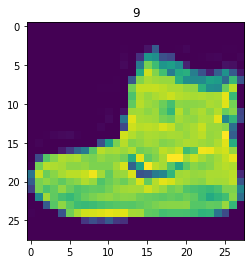

In [10]:
# Visualizando uma imagem (matplotlib):

plt.imshow(imagens_treino[0])
plt.title(id_treino[0])

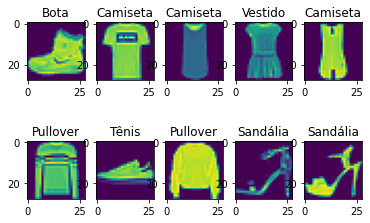

In [11]:
# Visualizando 10 imagens:

for imagem in range(10):
    
    plt.subplot(2,5,imagem+1)
    plt.imshow(imagens_treino[imagem])
    plt.title(labels[id_treino[imagem]])

***

### O modelo terá 3 etapas que acontecerão em sequência. São elas:

* Entrada
* Processamento
* Saída

***

In [12]:
# Camada 0 (entrada): Achatamento dos dados. Uma imagem com dimensões 28x28 (array de 2 dimensões) será transformada num array de 1 dimensão.

# Camada 1 (processamento): É uma camada mais densa. Parâmetro da função Dense: número de funções (aleatório - são necessários testes para saber o melhor). 
#                           Preferencialmente número par. Segundo parâmetro: activation, que define como essas funções da camada 1 se comunicarão com as da camada 0.
#                           Dentro do tensorflow,na parte de redes neurais (Neural Networks), existe uma função chamada relu, que tem sido usada nessas ocasiões.

# Camada 2 (saída): Primeiro parâmetro é o número de classificações do nosso modelo (10).


imagens_treino = imagens_treino/float(255)  # Ver NOTA 1 (normalização)

modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),   # entrada
    keras.layers.Dense(256, activation = tensorflow.nn.relu),        # processamento
    keras.layers.Dropout(0.2),                                       # Ver NOTA 4 (inserir essa camada somente se necessário)
    #keras.layers.Dense(128, activation = tensorflow.nn.relu),       # Camada intermediária. Ver NOTA 2.
    #keras.layers.Dense(64, activation = tensorflow.nn.relu),        # Camada intermediária 2. Não deu certo, a perda (loss) aumentou.
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)       # saída
])

### Sobre a função ReLu (Unidade Linear Retificada):

* É uma função não-linear.
* Valores de entrada negativos são convertidos para valores de saída iguais a zero.
* Valores de entrada positivos dão origem a valores de saída positivos.

### Sobre a função Softmax:

* Calcula as probabilidades de uma determinada classificação estar correta. Retornará um valor entre 0 e 1.

### O modelo acima é considerado um modelo de 2 camadas.

In [13]:
# Compilação do modelo:

modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#### Para saber o quanto o modelo está acertando, parâmetro 'metrics'. Obs. Entre colchetes porque pode ser mais de 1 métrica.

In [14]:
# Treinamento do modelo:

historico = modelo.fit(imagens_treino, id_treino, epochs = 4, validation_split = 0.2)
historico

Epoch 1/4
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5266 - accuracy: 0.8115 - val_loss: 0.4128 - val_accuracy: 0.8505
Epoch 2/4
1500/1500 [==============================] - 1s 974us/step - loss: 0.3993 - accuracy: 0.8536 - val_loss: 0.3802 - val_accuracy: 0.8622
Epoch 3/4
1500/1500 [==============================] - 1s 977us/step - loss: 0.3653 - accuracy: 0.8665 - val_loss: 0.3517 - val_accuracy: 0.8715
Epoch 4/4
1500/1500 [==============================] - 1s 981us/step - loss: 0.3445 - accuracy: 0.8717 - val_loss: 0.3335 - val_accuracy: 0.8764


#### A perda nesse modelo está em 4.0862. Situação ideal: quanto mais perto de zero, melhor. (1 vez que treinou)

#### Perda de 0.4839 (Quando normalizamos)

#### Podemos tentar trainar o modelo mais vezes, para tentar diminuir a perda. Parâmetro "epochs". Padrão é treinar 1x. (Perda passou para 0.2688, com epochs = 5)

#### Fazendo agora epochs = 10. (perda passou para: 0.1633)

#### Ajuste no modelo (NOTA 4): valores mudaram novamente.

***

### NOTA 1: 

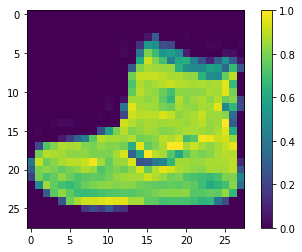

In [15]:
# Buscando mais informações sobre as cores das imagens:

plt.imshow(imagens_treino[0])
plt.colorbar()

#### Veja que a escala de cores varia de 0 a um pouco mais de 250 (aproximadamente 255 pixels). 

#### Faremos com que essa escala varie entre 0 e 1. (Processo chamado de normalização)

***

### NOTA 2:

#### Criação de uma camada intermediária: Captação de detalhes que podem ter sido perdidos. Parâmetro  128: aleatório. Fazer experimentação.
#### Caso o erro (loss) não diminua, excluir/comentar camadas intermediárias e reiniciar o kernel.

***

## Testando o modelo:

***

In [16]:
testes = modelo.predict(imagens_teste)

In [17]:
# Visualizando o primeiro elemento de testes:

testes[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

#### Note que o predict retornou um array com floats, ou seja, há informações depois da vírgula que não temos acesso.
#### Para sabermos o resultado, se o teste deu certo, precisamos do numpy, função argmax (argumento máximo), com a qual selecionaremos o argumento de maior valor:

In [18]:
# Verificando a previsão do modelo:

print('Resultado do teste para a imagem de teste 0: ', np.argmax(testes[0]))
print('Verificando se a descrição da imagem teste 0 é essa mesmo: ', id_teste[0])

Resultado do teste para a imagem de teste 0:  9
Verificando se a descrição da imagem teste 0 é essa mesmo:  9


In [19]:
# Verificando mais um item:

print('Resultado do teste para a imagem de teste 0: ', np.argmax(testes[1]))
print('Verificando se a descrição da imagem teste 0 é essa mesmo: ', id_teste[1])

Resultado do teste para a imagem de teste 0:  2
Verificando se a descrição da imagem teste 0 é essa mesmo:  2


### Avaliar quanto o modelo acertou/errou:

In [20]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, id_teste)
print(perda_teste, acuracia_teste)

313/313 [==============================] - 0s 895us/step - loss: 50.7046 - accuracy: 0.8583
50.70461654663086 0.858299970626831


***

## NOTA 3:

#### Note que a perda está muito alta e a acurácia, muito baixa. 

#### No momento do treinamento do modelo, separamos em dados de treino e dados de teste. Podemos, também, separar dados para a VALIDAÇÃO do modelo.

In [21]:
# Analisando os resultados de 'historico':

historico.history # Retorna valores dos parâmetros por época

{'loss': [0.5266146063804626,
  0.39925625920295715,
  0.365285187959671,
  0.3445420265197754],
 'accuracy': [0.8115416765213013,
  0.8536041378974915,
  0.8665000200271606,
  0.871749997138977],
 'val_loss': [0.41282758116722107,
  0.38021668791770935,
  0.35174328088760376,
  0.3335176110267639],
 'val_accuracy': [0.8504999876022339,
  0.8622499704360962,
  0.8715000152587891,
  0.8764166831970215]}

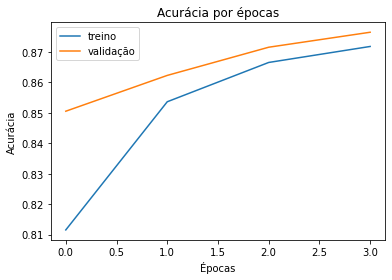

In [22]:
# Plotando um gráfico das acurácias (acurácia de treino e acurácia de validação):

plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['treino', 'validação'])

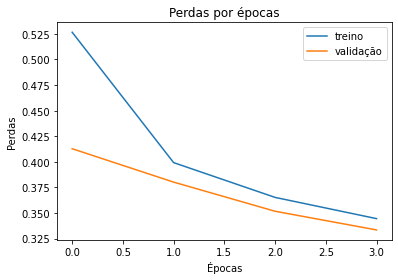

In [23]:
# Plotando um gráfico das perdas (perdas de treino e perdas de validação):

plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por épocas')
plt.xlabel('Épocas')
plt.ylabel('Perdas')
plt.legend(['treino', 'validação'])

#### Note que, com 10 épocas de treinamento, os valores de treino estão bons até demais, chamado overfitting. Tão bons que os dados de validação estão ruins perto dos de treino.

#### Bom método de identificação do overfitting: Linhas de treino indo muito bem e linhas de validação indo mal.

<img src=images/overfitting.png>

***

## NOTA 4:

#### Para ajustar o overfitting, observar os gráficos e perceber onde o comportamento do gráfico de validação é o esperado. No nosso caso, ajustar o parâmetro 'epochs' para 4 não ajudou.

#### A próxima tentativa de ajuste do overfitting é mexer nas camadas do modelo. Das 256 células que estipulamos, algumas podem estar "adormecidas". Incluímos, então, uma linha para retirar, aproximadamente, 20\% dessas células. Deu certo. (É um tipo de normalização)

#### A quantidade de vezes que a célula é executada interfere nos gráficos.

In [24]:
# Salvando o modelo:
# .hr: extensão para grandes volumes de dados.

modelo.save('modelo.h5')

# modelo_epochs5_nos3.h5 (quando houver mais de 1 modelo, renomeá-lo com o numero de épocas e o numero de nós (camadas))

In [25]:
# Carregando o modelo salvo:

from tensorflow.keras.models import load_model

modelo_salvo = load_model('modelo.h5')

In [26]:
# Testando o modelo salvo:

testes_salvo = modelo_salvo.predict(imagens_teste)
print('Resultados modelo salvo: ', np.argmax(testes_salvo[1]))
print('Verificando se a descrição da imagem teste 1 é essa mesmo: ', id_teste[1])

Resultados modelo salvo:  2
Verificando se a descrição da imagem teste 1 é essa mesmo:  2


***

## Entendendo melhor sobre o que acontece por baixo dos panos

In [27]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


#### Suponha que o 0.8 abaixo seja o melhor resultado que o modelo alcançou, ou seja, que o modelo acertou nesse ponto:

<img src = 'images/pesos.png'>

#### Consideraremos, então, os valores que nos guiaram até o melhor resultado como sendo os valores mais importantes:

<img src= 'images/pesos2.png'>

#### Estes serão os pesos do nosso modelo.

In [28]:
# Pesos da camada 1, onde acontece a ReLu:

pesos_camada_dense = modelo.layers[1].get_weights()[0]

#### Viés: O quão distante o modelo está de acertar uma classificação. Exemplo: Um vestido classificado como sandália tem viés MAIOR do que o mesmo vestido classificado como saia.

In [29]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]

#### Para saber a importância dos pesos, vamos zerá-los:

In [30]:
pesos_camada_dense.shape

(784, 256)

In [31]:
pesos_camada_dense_zerados = np.zeros((784,256))

In [32]:
pesos_camada_dense_zerados

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
# Substituindo: (manter vieses inalterados)

modelo.layers[1].set_weights([pesos_camada_dense_zerados,vieses_camada_dense])

In [43]:
# Rodando o modelo com as alterações:

modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

historico = modelo.fit(imagens_treino, id_treino, epochs = 4, validation_split = 0.2)
historico

Epoch 1/4
1500/1500 [==============================] - 2s 1ms/step - loss: 3.5425 - accuracy: 0.7559 - val_loss: 2.4149 - val_accuracy: 0.7723
Epoch 2/4
1500/1500 [==============================] - 2s 1ms/step - loss: 1.8115 - accuracy: 0.7822 - val_loss: 1.1628 - val_accuracy: 0.8278
Epoch 3/4
1500/1500 [==============================] - 2s 1ms/step - loss: 1.0274 - accuracy: 0.8030 - val_loss: 0.7828 - val_accuracy: 0.8200
Epoch 4/4
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6308 - accuracy: 0.8281 - val_loss: 0.5406 - val_accuracy: 0.8523


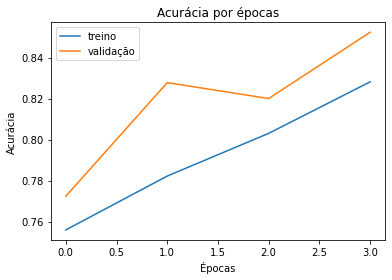

In [44]:
# Plotando o gráfico novamente para comparar:

# Plotando um gráfico das acurácias (acurácia de treino e acurácia de validação):

plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['treino', 'validação'])

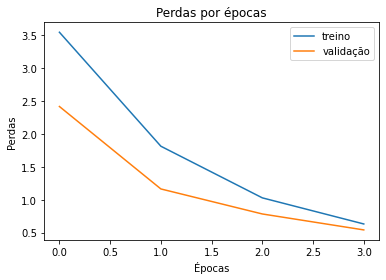

In [45]:
# Plotando um gráfico das perdas (perdas de treino e perdas de validação):

plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por épocas')
plt.xlabel('Épocas')
plt.ylabel('Perdas')
plt.legend(['treino', 'validação'])

#### No exemplo, houve diferença nos gráficos e a difernça não foi vantajosa. Próximo passo é inicializar o modelo com outros valores de pesos.

In [38]:
pesos_camada_dense_aleatorios = np.random.rand(784,256)

In [39]:
modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense])

In [46]:
# Rodando o modelo com as alterações:

modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
historico = modelo.fit(imagens_treino, id_treino, epochs = 4, validation_split = 0.2)
historico

Epoch 1/4
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5141 - accuracy: 0.8411 - val_loss: 0.4848 - val_accuracy: 0.8580
Epoch 2/4
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4378 - accuracy: 0.8526 - val_loss: 0.4397 - val_accuracy: 0.8659
Epoch 3/4
1500/1500 [==============================] - 1s 991us/step - loss: 0.4036 - accuracy: 0.8619 - val_loss: 0.4161 - val_accuracy: 0.8653
Epoch 4/4
1500/1500 [==============================] - 1s 999us/step - loss: 0.3781 - accuracy: 0.8676 - val_loss: 0.4035 - val_accuracy: 0.8687


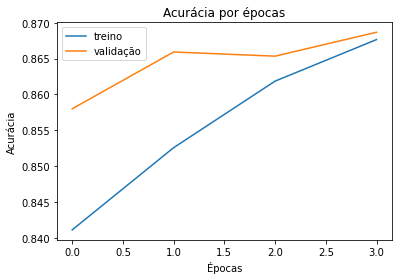

In [47]:
# Plotando o gráfico novamente para comparar:

# Plotando um gráfico das acurácias (acurácia de treino e acurácia de validação):

plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['treino', 'validação'])

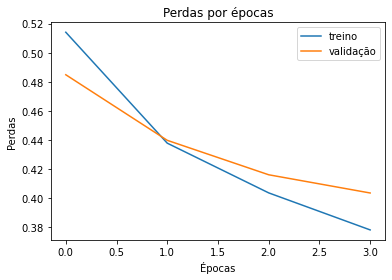

In [48]:
# Plotando um gráfico das perdas (perdas de treino e perdas de validação):

plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por épocas')
plt.xlabel('Épocas')
plt.ylabel('Perdas')
plt.legend(['treino', 'validação'])

#### As modificações não foram vantajosas.

In [49]:
# Explorar a configuração do modelo:

modelo.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
    'rate': 

#### Fazer a mesma exploração com os vieses: zera-los e depois colocar no modo randômico. Obs. Manter os pesos zerados e depois os pesos aleatórios.

### Como a ReLu funciona por baixo dos panos:

### saída = ReLu(multiplica (entrada, peso) + viés)


### output = activation(dot (input, kernel) + bias) ==> ((i * w) + b)

***

## Gradiente descendente: 

### Objetivo é chegar num ponto onde a perda é a menor. Esse percurso pode ser acelerado, ou seja, ter um **momentum** alto ou menos acelerado, **momentum** baixo.

#### Momentum alto: podemos passar do ponto onde queremos chegar.
#### Momentum baixo: podemos demorar até chegar nesse ponto.

***

Como podemos ver na configuração inicial da camada Dense na documentação do Keras, 

keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)

O inicializador de kernel ou matriz de pesos é chamado de glorot uniforme e os vieses são inicializados com 0.

Glorot, pois é o sobrenome de Xavier Glorot que escreveu o artigo que define esse inicializador. Ele também é conhecido como o inicializador uniforme de Xavier.

E o que esse inicializador faz? Bom, ele pega nossos dados de treino e define possíveis valores para os pesos, como abaixo:

pesos = [1,2,3,4,5]

A cada propagação da rede esses valores alteram, sendo que a probabilidade de cada um deles acontecer permanece 1/5.

Fazer com que essa probabilidade permaneça igual para cada um dos números é algo chamado de distribuição uniforme.

Então, o algoritmo pega essas amostras de uma distribuição uniforme, define valores, mas quais valores? De 1 até 1.000? De 0 até 5? Qual o limite?

Para saber isso, o algoritmo resolve a seguinte conta:

sqrt(6 / (unidades_de_entrada_do_kernel + unidades_de_saída_do_kernel )) 

Repare que ele pega tudo que entra para ser calculado, junta com tudo o que vai sair, que são nossas unidades de entrada e saída da camada, divide por 6 e pega a raiz quadrada desse número.

E porque isso é importante? Porque desse modo os pesos ficam dentro de uma faixa de valores, o que garante que eles fiquem “na medida”, nem muito pequenos a ponto de sumirem e nem muito grandes a ponto de explodirem.

Veja [Artigo](http://jmlr.org/proceedings/papers/v9/glorot10a/glorot10a.pdf)

***

#### Mínimos:

* Menor perda global (mínimo global): Ponto onde a perda é a menor de todo o modelo.

* Menor perda local (mínimo local): Menor naquele ponto do gráfico.

#### É comum "pararmos" em um mínimo local achando que este é o mínimo global. Deve-se sempre ter certeza que não há outro ponto onde o mínimo é ainda menor.

***

### Gradiente descendente estocástico:

#### Quando escolhemos, aleatoriamente, pontos de partida para começar a exploração do modelo a fim de identificar o seu mínimo global, isto é, em vez de analisarmos todo o modelo, escolhemos pontos de partida para começar a busca.

## Uso de Otimizadores:

* SGD: Stocastic Gradient Descent optimizer

* ADAM (ADAptative Moment estimation): Considerado um dos melhores otimizadores. Analisa os vieses e ajusta para chegar no ponto certo.

* Observação: Dizemos que o modelo está "convergindo" quando ele está caminhando para o melhor resultado.

#### Todos os parâmetros passados ANTES do treinamento do modelo são chamados de hiperparâmetros. Os parâmetros que são passados depois do treinamento, são apenas parâmetros.

## Parâmetros do otimizador ADAM:

In [54]:
adam = keras.optimizers.Adam(learning_rate = 0.001)

# Aumentar muito a learning_rate pode fazer o modelo aprender rápido demais e, em consequência disso, perder informações.  Assim, sua perda vai aumentar muito.
# Para ajustá-lo, é necessária experimentação.

# batch_size: Tamanho do conjunto de dados. Se aumentar o learning_rate pode ser prejudicial, talvez aumentá-lo e, ao mesmo tempo, diminuir a quantidade de informação 
# que a máquina tem que processar pode ajudar a solucionar o problema.

## Callback: QUando e perda de validação parar de baixar, isto é, estacionar, não vale  =a pena continuar o treinamento. Por esse motivo, o comando manda o treinamento parar.

callbacks = [keras.callbacks.EarlyStopping(monitor = 'val_loss'), keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5', monitor = 'val_loss',save_best_only = True)]

modelo.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
historico = modelo.fit(imagens_treino, id_treino, batch_size = 400, epochs = 4, validation_split = 0.2, callbacks = callbacks)

Epoch 1/4
120/120 [==============================] - 1s 4ms/step - loss: 0.2291 - accuracy: 0.9147 - val_loss: 0.3586 - val_accuracy: 0.8900


### Fazendo o checkpoint do modelo:

* EarlyStopping: modelo para de treinar antes do fim quando um parâmetro pré-definito estacionar.
* ModelCheckpoint: monitora determinado parâmetro e salva o melhor modelo apenas (tb dá pra savar os pesos/vieses. 